# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
# from api_keys import weather_api_key
weather_api_key = "25d9fd8405b291dd9b1e075855e3e31d"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

temp_units = "imperial"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={temp_units}&q="

In [11]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=25d9fd8405b291dd9b1e075855e3e31d&units=imperial&q='

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [19]:
#setting the variables: 
latitude = []
longitude = []
max_temp = []
humid = []
cloudy =[]
wind_speed = []
countries = []
date = []
city_nm = []

#setting counts for log
count = 0
set_log= 1

print("Beginning Data Retrieval")
print("------------------------------")

#for loop for df creation
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ", "&")).json()
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        date.append(response['dt'])
        if count >= 50:
            count = 1
            set_log = set_log + 1
            city_nm.append(city)
        else:
            count = count + 1
            city_nm.append(city)
        print(f"Processing Record {count} of set {set_log} | {city}")
    except Exception:
        print("city not found.Skipping .....")

Beginning Data Retrieval
------------------------------
Processing Record 1 of set 1 | shimsk
Processing Record 2 of set 1 | khatanga
Processing Record 3 of set 1 | cabo san lucas
Processing Record 4 of set 1 | east london
Processing Record 5 of set 1 | ushuaia
Processing Record 6 of set 1 | akyab
Processing Record 7 of set 1 | jamestown
Processing Record 8 of set 1 | narsaq
Processing Record 9 of set 1 | port elizabeth
Processing Record 10 of set 1 | torbay
Processing Record 11 of set 1 | khandyga
Processing Record 12 of set 1 | poum
Processing Record 13 of set 1 | yangambi
Processing Record 14 of set 1 | hobart
Processing Record 15 of set 1 | toktogul
Processing Record 16 of set 1 | rikitea
Processing Record 17 of set 1 | iqaluit
Processing Record 18 of set 1 | bethel
Processing Record 19 of set 1 | verkh-usugli
Processing Record 20 of set 1 | clyde river
Processing Record 21 of set 1 | hun
Processing Record 22 of set 1 | tuktoyaktuk
Processing Record 23 of set 1 | vaini
Processing R

Processing Record 38 of set 4 | leningradskiy
Processing Record 39 of set 4 | mitu
Processing Record 40 of set 4 | alofi
Processing Record 41 of set 4 | grenaa
city not found.Skipping .....
Processing Record 42 of set 4 | leh
Processing Record 43 of set 4 | jacareacanga
Processing Record 44 of set 4 | upernavik
Processing Record 45 of set 4 | dikson
Processing Record 46 of set 4 | necochea
Processing Record 47 of set 4 | talnakh
Processing Record 48 of set 4 | payakumbuh
Processing Record 49 of set 4 | yar-sale
Processing Record 50 of set 4 | sao joao da barra
Processing Record 1 of set 5 | black diamond
Processing Record 2 of set 5 | kattivakkam
Processing Record 3 of set 5 | axim
Processing Record 4 of set 5 | aljezur
Processing Record 5 of set 5 | oroville
Processing Record 6 of set 5 | itapema
Processing Record 7 of set 5 | tibati
Processing Record 8 of set 5 | mastic beach
Processing Record 9 of set 5 | alice springs
Processing Record 10 of set 5 | belyy yar
Processing Record 11 o

Processing Record 22 of set 8 | palmer
Processing Record 23 of set 8 | santona
Processing Record 24 of set 8 | valparaiso
Processing Record 25 of set 8 | ugoofaaru
Processing Record 26 of set 8 | airai
Processing Record 27 of set 8 | abu dhabi
Processing Record 28 of set 8 | bucak
Processing Record 29 of set 8 | klamath falls
Processing Record 30 of set 8 | rabaul
Processing Record 31 of set 8 | kudahuvadhoo
Processing Record 32 of set 8 | kyra
Processing Record 33 of set 8 | weihai
Processing Record 34 of set 8 | sakaiminato
Processing Record 35 of set 8 | mamallapuram
Processing Record 36 of set 8 | muroto
Processing Record 37 of set 8 | bukama
Processing Record 38 of set 8 | lorengau
city not found.Skipping .....
Processing Record 39 of set 8 | vostok
Processing Record 40 of set 8 | emerald
Processing Record 41 of set 8 | capreol
Processing Record 42 of set 8 | barra mansa
Processing Record 43 of set 8 | aden
Processing Record 44 of set 8 | port shepstone
Processing Record 45 of set

In [ ]:
latitude = []
longitude = []
max_temp = []
humid = []
cloudy =[]
wind_speed = []
countries = []
date = []
city_nm = []

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_df = pd.DataFrame({'City': city_nm,'Lat':latitude,'Lng':longitude,'Max Temp': max_temp,
                           'Humidity':humid, 'Cloudiness':cloudy,'Wind Speed': wind_speed,
                           'Country':countries,'Date':date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shimsk,58.21,30.71,35.98,85,47,11.70,RU,1603073103
1,khatanga,71.97,102.50,7.29,87,0,8.61,RU,1603073103
2,cabo san lucas,-8.28,-35.03,78.80,69,75,10.29,BR,1603073103
3,east london,65.00,-15.00,37.40,93,90,16.11,IS,1603073103
4,ushuaia,-54.80,-68.30,39.20,69,75,10.29,AR,1603073103


In [35]:
#export the df as a csv 
weather_df.to_csv('city_weather.csv', header = True , index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [46]:
high_humid = weather_df.loc[weather_df['Humidity'] > 100]
high_humid



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

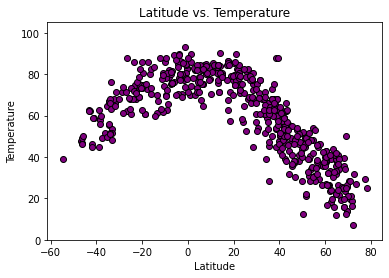

In [80]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolors="black", marker="o", facecolor ="purple")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.ylim(0,105)
plt.title("Latitude vs. Temperature")
plt.savefig("../figures_data/lat_vs_temp.png")

## Latitude vs. Humidity Plot

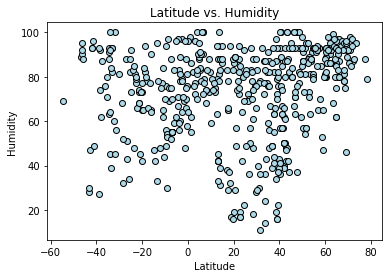

In [79]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], edgecolors="black", marker="o", facecolor ="lightblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.savefig("../figures_data/lat_vs_humid.png")

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression